In [2]:
#import pandas and matplotlib library
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [3]:
#load the dataset
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\netflix_data.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
...,...,...,...,...,...,...,...,...,...,...,...
4807,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,88,Looking to survive in a world taken over by zo...,Comedies
4808,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,94,A drug dealer starts having doubts about his t...,Dramas
4809,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
4810,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas


In [113]:
#find out the number of action movies which release 1990 - 1999 consist of the duration under 90 minutes

filtered_df = df[(df['type'] == 'Movie') & (df['release_year'] >= 1990) & (2000 > df['release_year']) & (df['genre'] == "Action")]

count = 0
for i, j in filtered_df.iterrows():
    if j['duration'] < 90:
        count = count + 1
    else:
        count = count

print(count)

7


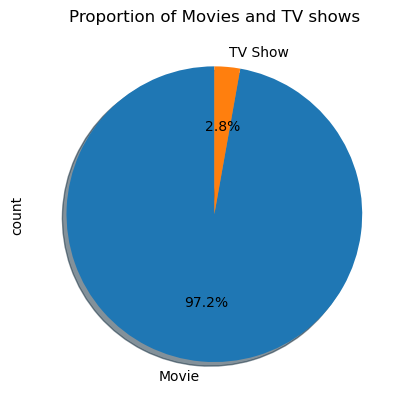

In [114]:
#pie plot the ratio of Movies and TV shows

df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Proportion of Movies and TV shows")
plt.show()

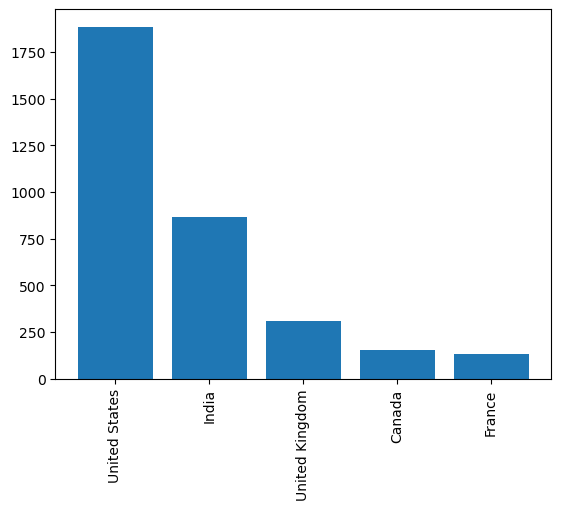

In [127]:
#top five country producing most movies

country = df['country'].value_counts().head(5)
plt.bar(country.index, country.values)
plt.xticks(rotation=90)
plt.show()

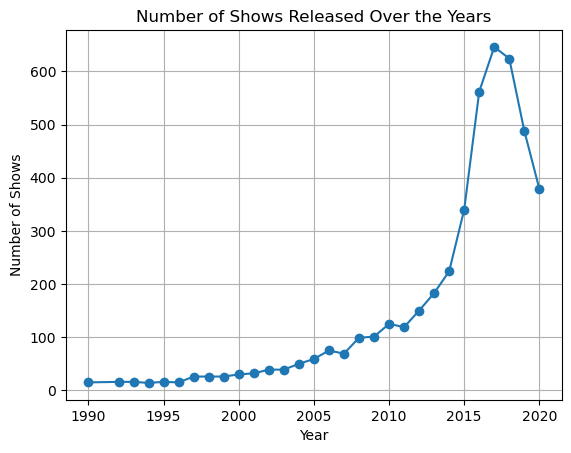

In [117]:
#number of shows released over the yeras

df['release_year'].value_counts().head(30).sort_index().plot(kind='line', marker='o')
plt.title("Number of Shows Released Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Shows")
plt.grid(True)
plt.show()

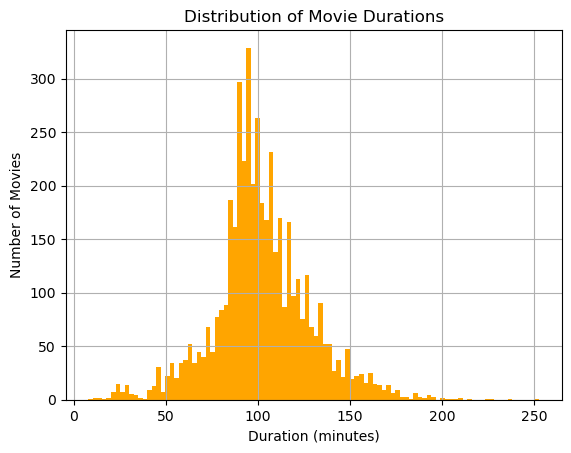

In [119]:
# Extract numeric duration from movie entries

df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration_num'] = df_movies['duration']

plt.hist(df_movies['duration_num'].dropna(), bins=100, color='orange')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

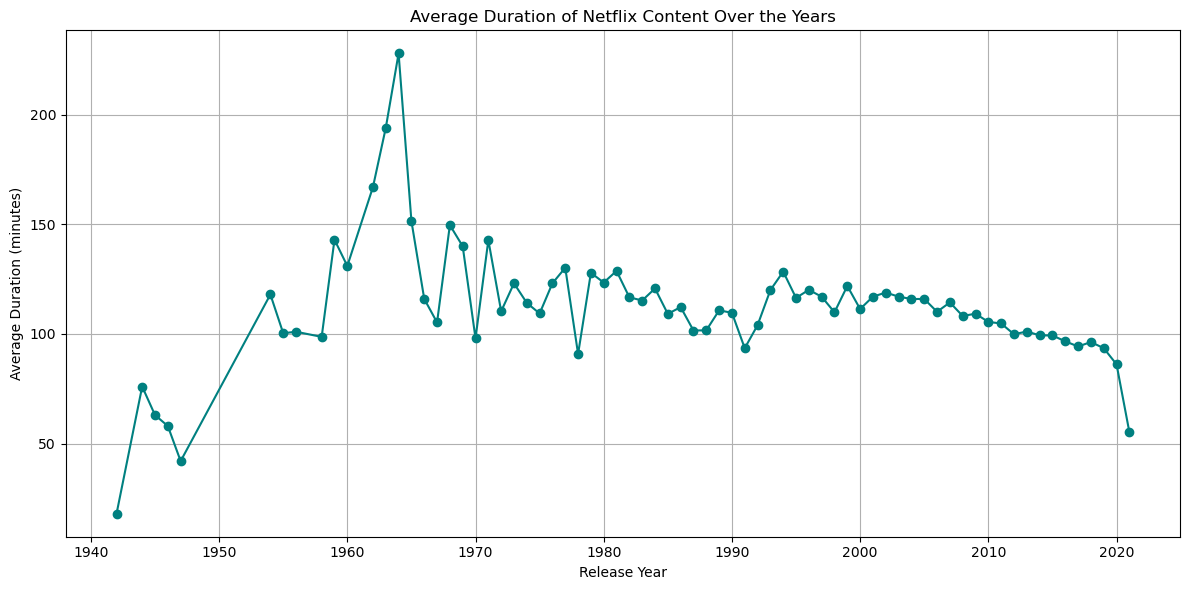

In [128]:
#average duration of the contents over the years

sub = df.dropna(subset=['duration', 'release_year'])

# Group by year and calculate average duration
avg_duration_per_year = sub.groupby('release_year')['duration'].mean()
max = sub.groupby('release_year')['duration'].max()

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(avg_duration_per_year.index, avg_duration_per_year.values, marker='o', color='teal')
plt.title("Average Duration of Netflix Content Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Average Duration (minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [129]:
#movie details of max duration and min duration

min_duration_movie = df_movies.loc[df_movies['duration'].idxmin()]
max_duration_movie = df_movies.loc[df_movies['duration'].idxmax()]
print(f" Details of minimum duration movie: {min_duration_movie}")
print(f" Details of maximum duration movie: {max_duration_movie}")

 Details of minimum duration movie: show_id                                                     s1502
type                                                        Movie
title                                            Cops and Robbers
director                           Arnon Manor, Timothy Ware-Hill
cast                                            Timothy Ware-Hill
country                                             United States
date_added                                      December 28, 2020
release_year                                                 2020
duration                                                        8
description     Animation and activism unite in this multimedi...
genre                                                      Dramas
duration_num                                                    8
Name: 959, dtype: object
 Details of maximum duration movie: show_id                                                     s6851
type                                         

<function matplotlib.pyplot.show(close=None, block=None)>

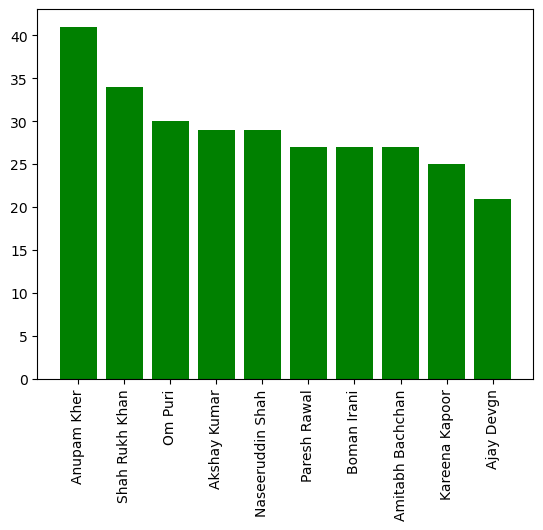

In [130]:
#top 10 actors that have most movies

df_cast = df.dropna(subset=['cast'])

cast_series = df_cast['cast'].str.split(', ')

all_actors = cast_series.explode()

actor_counts = all_actors.value_counts().head(10)
actor_counts
plt.bar(actor_counts.index, actor_counts.values, color='green')
plt.xticks(rotation=90)
plt.show